# Problem 3.2 of FVMHP

Partial Python solution to Problem 3.2 of *Finite Volume Methods for Hyperbolic Problems*.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
from numpy.linalg import eig, solve

In [3]:
def plot_pt(q, label, color='b'):
    plot([q[0]], [q[1]], 'o', color=color, label=label)

In [4]:
def solve_Rp(A,ql,qr):
    """
    Solve the Riemann problem for a 2x2 matrix A and given left and right states.
    """
    
    print('Matrix A:\n', A)
    
    # compute eigenvalues and vectors:
    evals, R = eig(A)
    
    # reorder if necessary so evals[0] <= evals[1]
    jorder = argsort(evals)  # indices in order needed to sort
    evals = evals[jorder]
    R = R[:,jorder]
    
    print('Eigenvalues of A:', evals)
    print('Matrix R of eigenvectors:\n',R)
    
    # check that problem is hyperbolic:
    assert isreal(evals).all(), '*** Eigenvalues are not real'
    condR = cond(R)
    print('Condition number of R is %g' % condR)
    assert cond(R) < 1e12, '*** Matrix probably is not diagonalizable'

    dq = qr - ql
    alpha = solve(R, dq)
    qm = ql + alpha[0]*R[:,0]
    
    print('alpha = ', alpha)
    print('qm = ', qm)
    
    figure(figsize=(6,5))
    plot_pt(ql,'ql','r')
    plot_pt(qr,'qr','g')
    plot_pt(qm,'qm','b')
    plot((ql[0],qm[0],qr[0]), (ql[1],qm[1],qr[1]), 'b')
    legend()
    grid(True)
    xlabel('first component of q')
    ylabel('second component of q')
    title('phase plane solution of Riemann problem')
    
    return qm


### Example usage

Matrix A:
 [[3 2]
 [0 1]]
Eigenvalues of A: [1. 3.]
Matrix R of eigenvectors:
 [[-0.70710678  1.        ]
 [ 0.70710678  0.        ]]
Condition number of R is 2.41421
alpha =  [2.82842712 3.        ]
qm =  [-1.  3.]


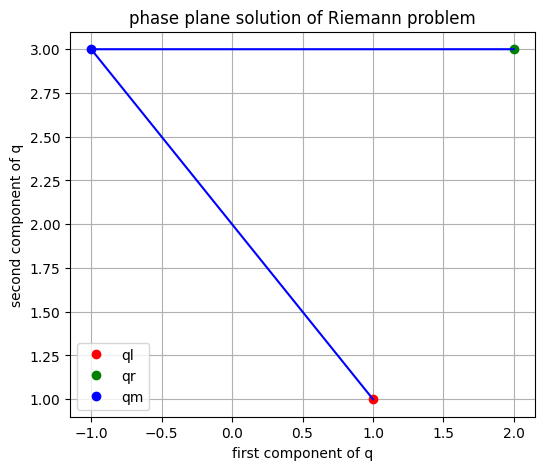

In [5]:
A = array([[3,2],[0,1]])
qleft = array([1,1])
qright = array([2,3])
qm = solve_Rp(A,qleft,qright)

### A non-hyperbolic case

In [6]:
A = array([[0,1],[-1,0]])
qleft = array([0,1])
qright = array([1,0])
qm = solve_Rp(A,qleft,qright)

Matrix A:
 [[ 0  1]
 [-1  0]]
Eigenvalues of A: [0.-1.j 0.+1.j]
Matrix R of eigenvectors:
 [[0.70710678-0.j         0.70710678+0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


AssertionError: *** Eigenvalues are not real